# **Objective:**
Use inputs X to predict the output using a linear model.
The model will be a line of best fit that minimizes the distance between the predicted (model's output) and target (ground truth) values.
Training data (X,y) is used to train the model and learn the weights W using gradient descent.

# **Generate data**
We're going to generate some simple dummy data to apply linear regression on. It's going to create roughly linear data (y = 4X + noise); the random noise is added to create realistic data that doesn't perfectly align in a line. Our goal is to have the model converge to a similar linear equation (there will be slight variance since we added some noise).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
SEED = 1234
NUM_SAMPLES = 50

In [ ]:
# Set seed for reproducibility
np.random.seed(SEED)

In [ ]:
# Generate synthetic data
def generate_data(num_samples):
    """Generate dummy data for linear regression."""
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-10, 20, size=num_samples)
    y = 4*X + random_noise # add some noise
    return X, y

In [ ]:
# Generate random (linear) data
X, y = generate_data(num_samples=NUM_SAMPLES)
data = np.vstack([X, y]).T
print (data[:5])

[[ 0.         -4.25441649]
 [ 1.         12.66326313]
 [ 2.         11.13183217]
 [ 3.         25.56075751]
 [ 4.         29.39927424]]


In [ ]:
# Load into a Pandas DataFrame
df = pd.DataFrame(data, columns=["X", "y"])
X = df[["X"]].values
y = df[["y"]].values
df.head()

,X,y
0,0.0,-4.254416
1,1.0,12.663263
2,2.0,11.131832
3,3.0,25.560758
4,4.0,29.399274


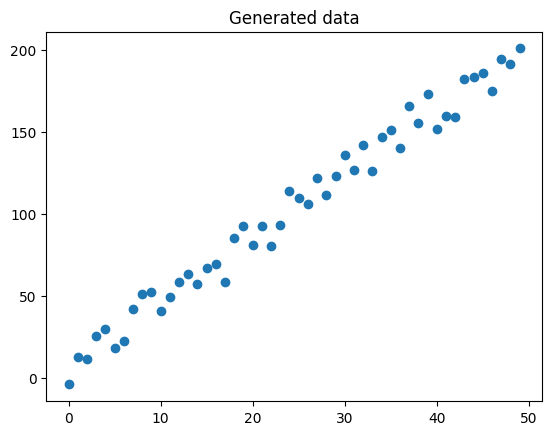

In [ ]:
# Scatter plot
plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()

# Implementation Using **NumPy**

Now that we have our data prepared, we'll first implement linear regression using just NumPy. This will let us really understand the underlying operations.

Split Data:

Since our task is a regression task, we will randomly split our dataset into three sets: train, validation, and test data splits.

Train: Used to train our model.

Validation (val): Used to validate our model's performance during training.

Test: Used to do an evaluation of our fully trained model.

In [ ]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [ ]:
# Shuffle data
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [ ]:
# Split indices
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [ ]:
# Split data
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val: (7, 1), y_test: (7, 1)
X_test: (8, 1), y_test: (8, 1)


# **Standardize** **data**

We need to standardize our data (zero mean and unit variance) so a specific feature's magnitude doesn't affect how the model learns its weights.

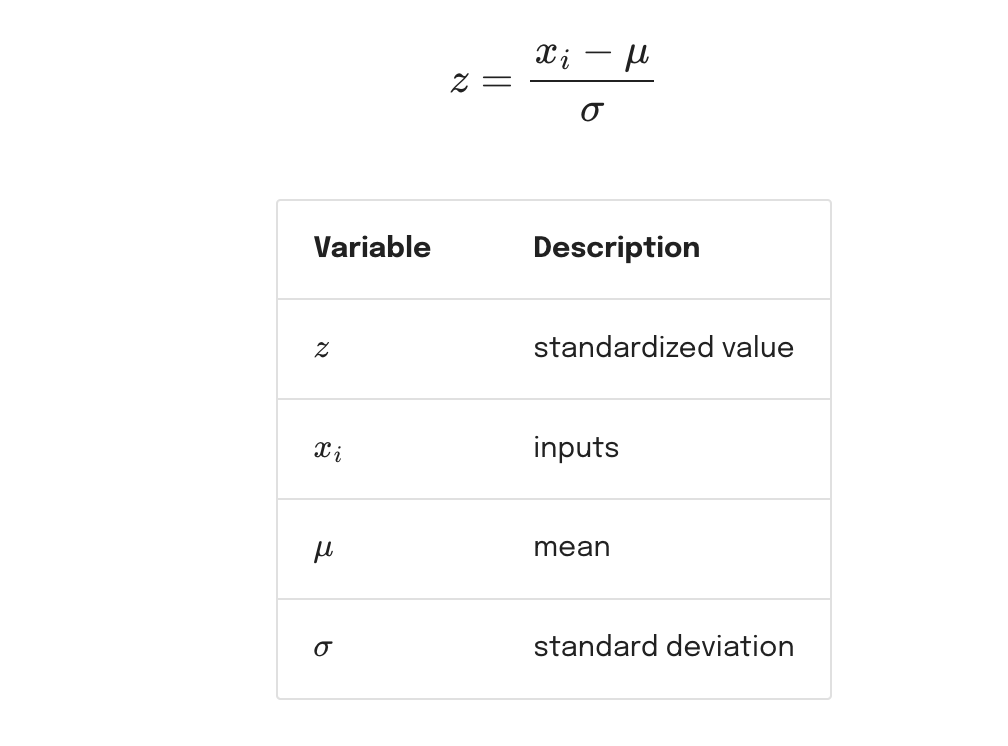

We need to treat the validation and test sets as if they were hidden datasets. So we only use the train set to determine the mean and std to avoid biasing our training process.

In [ ]:
def standardize_data(data, mean, std):
    return (data - mean)/std

In [ ]:
# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [ ]:
# Standardize
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

In [ ]:
# Check (means should be ~0 and std should be ~1)
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")


mean: -0.6, std: 0.9
mean: -0.6, std: 0.9


This standardization ensures that all features contribute equally to model learning and prevents large-valued features from dominating the training process.

# **Weights**

We begin by randomly initializing the weights and bias terms.

In [ ]:
INPUT_DIM = X_train.shape[1] # X is 1-dimensional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional

In [ ]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, 1))
print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


# **Model**

We compute the predicted values using the linear regression formula:

In [ ]:
# Forward pass [NX1] · [1X1] = [NX1]
y_pred = np.dot(X_train, W) + b
print (f"y_pred: {y_pred.shape}")

y_pred: (35, 1)


# **Loss**

We use the Mean Squared Error (MSE) function to quantify the difference between predictions and actual values.

In [ ]:
# Loss
N = len(y_train)
loss = (1/N) * np.sum((y_train - y_pred)**2)
print (f"loss: {loss:.2f}")

loss: 0.99


# **Gradients**

We compute the gradients with respect to the weights and bias to update them in the direction that minimizes the loss.

In [ ]:
# Backpropagation
dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
db = -(2/N) * np.sum((y_train - y_pred) * 1)

# **Update** **weights**

The weights and bias are updated using the computed gradients and a learning rate.

In [ ]:
LEARNING_RATE = 1e-1

In [ ]:
# Update weights
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

# **Training**

We repeat steps 2-5 for multiple epochs to iteratively reduce the loss and improve predictions.

In [ ]:
NUM_EPOCHS = 100

In [ ]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, ))

# Training loop
for epoch_num in range(NUM_EPOCHS):

    # Forward pass [NX1] · [1X1] = [NX1]
    y_pred = np.dot(X_train, W) + b

    # Loss
    loss = (1/len(y_train)) * np.sum((y_train - y_pred)**2)

    # Show progress
    if epoch_num%10 == 0:
        print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

    # Backpropagation
    dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
    db = -(2/N) * np.sum((y_train - y_pred) * 1)

    # Update weights
    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * db

Epoch: 0, loss: 0.990
Epoch: 10, loss: 0.033
Epoch: 20, loss: 0.022
Epoch: 30, loss: 0.022
Epoch: 40, loss: 0.022
Epoch: 50, loss: 0.022
Epoch: 60, loss: 0.022
Epoch: 70, loss: 0.022
Epoch: 80, loss: 0.022
Epoch: 90, loss: 0.022


# **Evaluation**

Now we're ready to see how well our trained model will perform on our test (hold-out) data split. This will be our best measure on how well the model would perform on the real world, given that our dataset's distribution is close to unseen data.

In [ ]:
# Predictions
pred_train = W*X_train + b
pred_test = W*X_test + b

In [ ]:
# Train and test MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

train_MSE: 0.02, test_MSE: 0.01


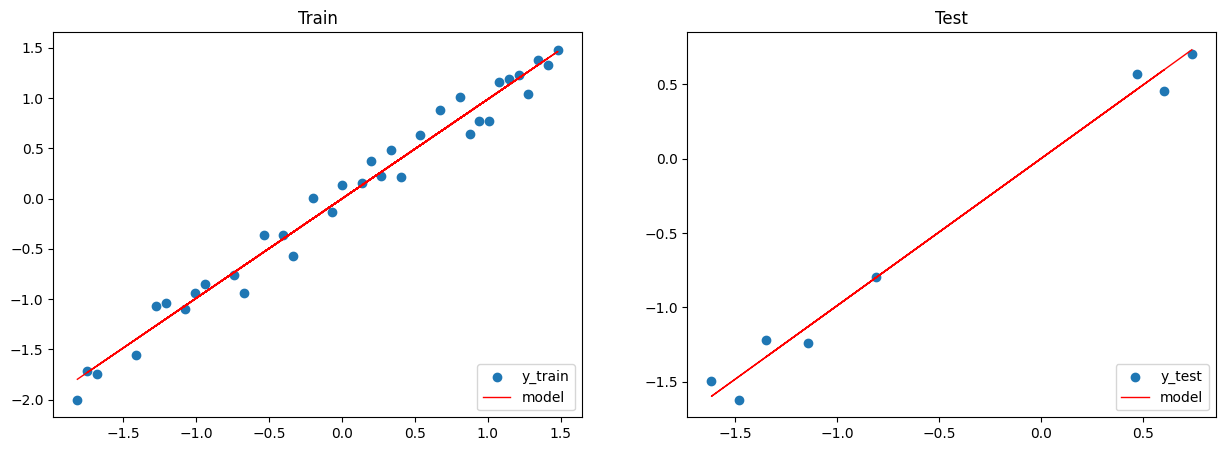

In [ ]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Show plots
plt.show()

# **Interpretability**

Since we standardized our inputs and outputs, our weights were fit to those standardized values. So we need to unstandardize our weights so we can compare it to our true weight (4.0).

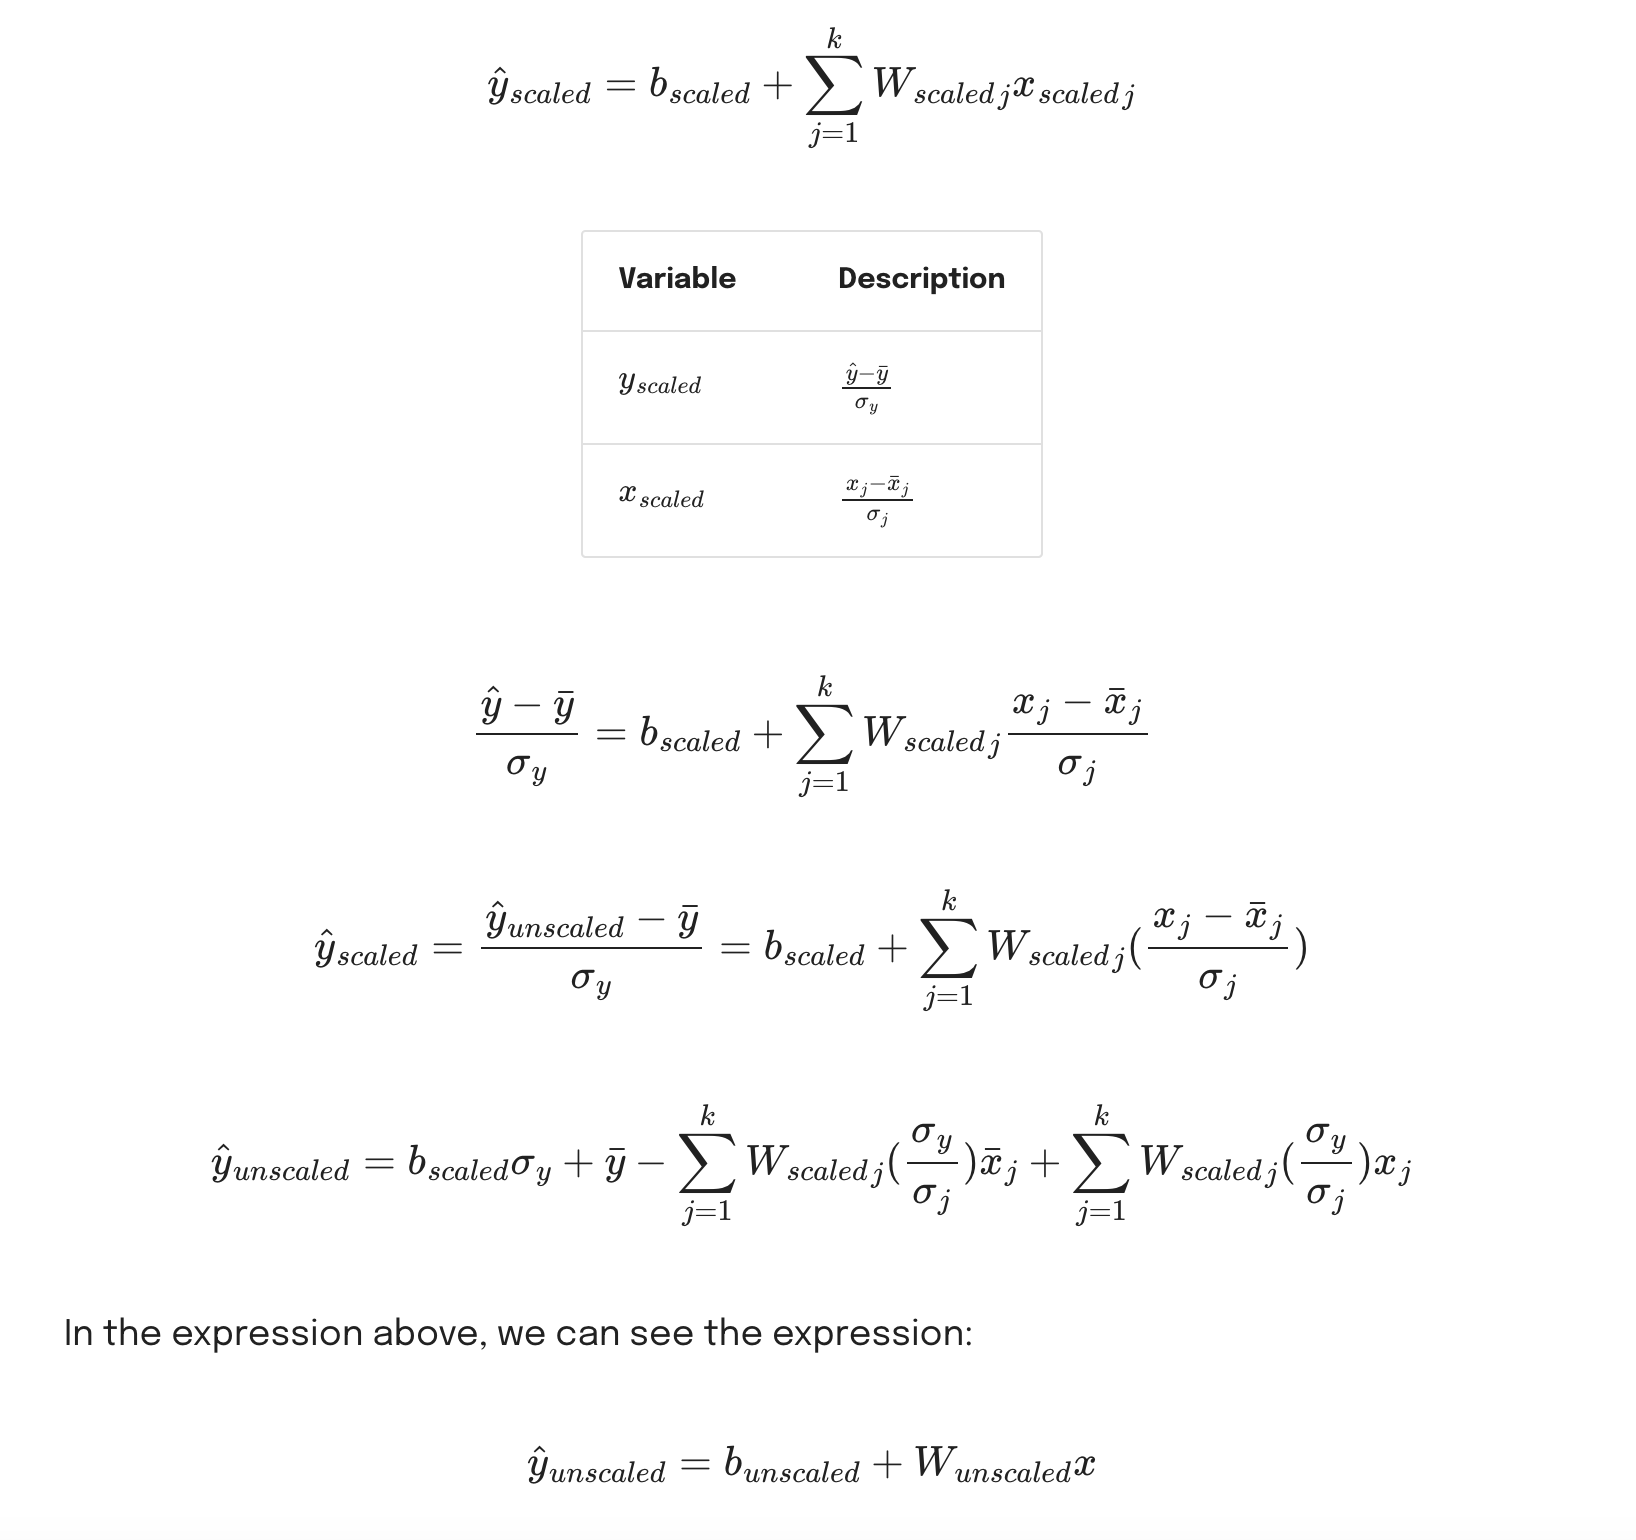

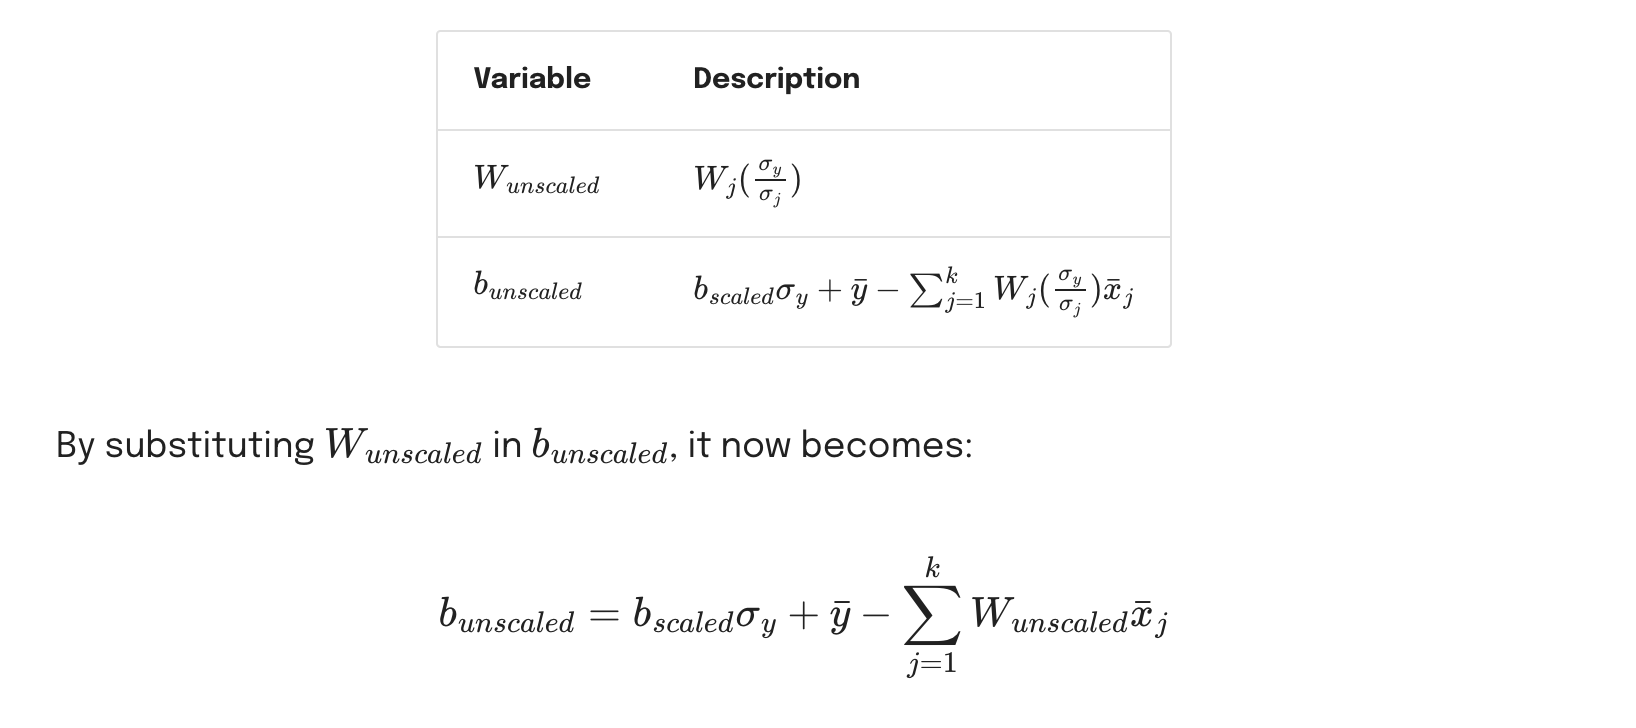

In [ ]:
# Unscaled weights
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled*X_mean)
print ("[actual] y = 4X + noise")
print (f"[model] y_hat = {W_unscaled[0][0]:.1f}X + {b_unscaled[0]:.1f}")

[actual] y = 4X + noise
[model] y_hat = 3.9X + 7.8


# **PyTorch**
Now that we've implemented linear regression with Numpy, let's do the same with PyTorch.

In [ ]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch import nn
from torch.optim import Adam
import matplotlib.pyplot as plt

In [ ]:
import torch
# Set seed for reproducibility
torch.manual_seed(1234)

# **Split data**
We will use scikit-learn's built in train_test_split function.



In [ ]:
# Import train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

# Define dataset split sizes
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

# Split (train)
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE)

# Print train split details
print(f"train: {len(X_train)} ({(len(X_train) / len(X)):.2f})\n"
      f"remaining: {len(X_)} ({(len(X_) / len(X)):.2f})")




train: 35 (0.70)
remaining: 15 (0.30)


In [ ]:
# Split (validation and test)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5)

# Print validation and test split details
print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")

train: 35 (0.70)
val: 7 (0.14)
test: 8 (0.16)


# **Standardize data**
This time we'll use scikit-learn's StandardScaler to standardize our data.

In [ ]:
# Standardize using training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Apply scaling
X_train = X_scaler.transform(X_train)
y_train = y_scaler.transform(y_train).reshape(-1, 1)
X_val = X_scaler.transform(X_val)
y_val = y_scaler.transform(y_val).reshape(-1, 1)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test).reshape(-1, 1)
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: 0.1, std: 0.9
mean: 0.1, std: 0.9


# **Weights**
We will be using PyTorch's Linear layers in our MLP implementation. These layers will act as out weights (and biases).

***z = XW***

In [ ]:
# Inputs
N = 3  # num samples
x = torch.randn(N, INPUT_DIM)
print(x.shape)
print(x.numpy())

torch.Size([3, 1])
[[ 0.04613046]
 [ 0.40240282]
 [-1.0115291 ]]


In [ ]:
m = nn.Linear(INPUT_DIM, OUTPUT_DIM)

# Manually set weights to 4 and bias to 0 to match y = 4X + noise
with torch.no_grad():
    m.weight.fill_(4.0)
    m.bias.fill_(0.0)

print(m)
print(f"weights ({m.weight.shape}): {m.weight[0][0]}")
print(f"bias ({m.bias.shape}): {m.bias[0]}")

Linear(in_features=1, out_features=1, bias=True)
weights (torch.Size([1, 1])): 4.0
bias (torch.Size([1])): 0.0


In [ ]:
# Forward pass
z = m(x)
print(z.shape)
print(z.detach().numpy())

torch.Size([3, 1])
[[ 0.18452185]
 [ 1.6096113 ]
 [-4.0461164 ]]


# **Model**

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.fc1 = nn.Linear(input_dim, output_dim)

        # Manually set weights to 4 and bias to 0 to match y = 4X + noise
        with torch.no_grad():
            self.fc1.weight.fill_(4.0)
            self.fc1.bias.fill_(0.0)

    def forward(self, x_in):
        return self.fc1(x_in)

# Initialize model
model = LinearRegression(input_dim=INPUT_DIM, output_dim=OUTPUT_DIM)
print(model.named_parameters)

<bound method Module.named_parameters of LinearRegression(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)>


# **Loss**

This time we're using PyTorch's loss functions, specifically MSELoss.

In [ ]:
loss_fn = nn.MSELoss()

# Sample predictions and target values
y_pred = torch.Tensor([0., 0., 1., 1.])
y_true = torch.Tensor([1., 1., 1., 0.])

# Compute loss
loss = loss_fn(y_pred, y_true)
print("Loss: ", loss.numpy())

Loss:  0.75


# **Optimizer**
When we implemented linear regression with just NumPy, we used batch gradient descent to update our weights (used entire training set). But there are actually many different gradient descent optimization algorithms to choose from and it depends on the situation. However, the ADAM optimizer has become a standard algorithm for most cases.

In [ ]:
from torch.optim import Adam

# Define the Adam optimizer with the learning rate
optimizer = Adam(model.parameters(), lr=0.1)


# **Training**

In [ ]:
# Convert data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.Tensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

# Training loop
NUM_EPOCHS = 100
for epoch in range(NUM_EPOCHS):
    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = loss_fn(y_pred, y_train)

    # Zero all gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | loss: {loss:.2f}")


Epoch: 0 | loss: 9.07
Epoch: 20 | loss: 1.29
Epoch: 40 | loss: 0.02
Epoch: 60 | loss: 0.04
Epoch: 80 | loss: 0.02


# **Evaluation**
Now we will valuate our trained model.



In [ ]:
# Predictions
pred_train = model(X_train)
pred_test = model(X_test)

# Compute performance metrics using Mean Squared Error (MSE)
train_error = loss_fn(pred_train, y_train)
test_error = loss_fn(pred_test, y_test)

# Print training and test errors
print(f"train_error: {train_error:.2f}")
print(f"test_error: {test_error:.2f}")


train_error: 0.02
test_error: 0.02


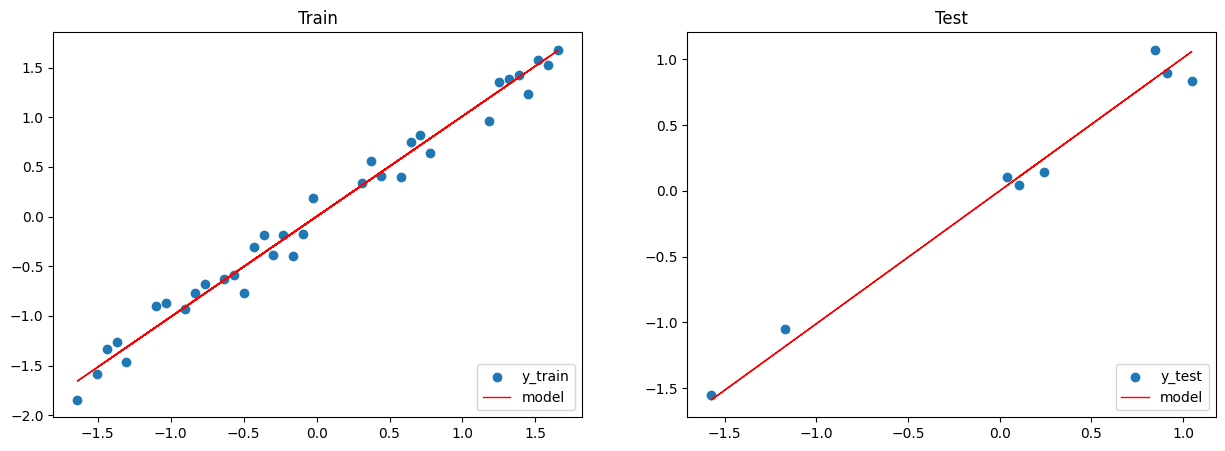

In [ ]:
# Set figure size
plt.figure(figsize=(15, 5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train.detach().numpy(), color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label="y_test")
plt.plot(X_test, pred_test.detach().numpy(), color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Show plots
plt.show()


# **Inference**
After training our model, we can use it to make predictions on new unseen data.

In [ ]:
# Feed in custom input values
sample_indices = [10, 15, 25]
X_infer = np.array(sample_indices, dtype=np.float32)

# Standardize input using the same scaler from training
X_infer = torch.Tensor(X_scaler.transform(X_infer.reshape(-1, 1)))


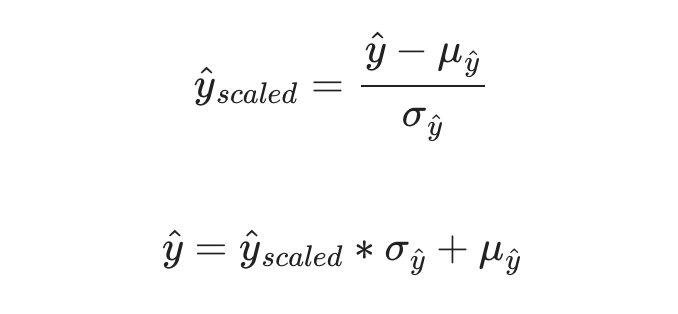

In [ ]:
# Unstandardize predictions
pred_infer = model(X_infer).detach().numpy()
pred_infer = pred_infer * np.sqrt(y_scaler.var_) + y_scaler.mean_

# Print actual vs. predicted values
for i, index in enumerate(sample_indices):
    actual_value = df.iloc[index]["y"]  # Fetch actual y value from the dataset
    print(f"{actual_value:.2f} (actual) → {pred_infer[i][0]:.2f} (predicted)")


40.73 (actual) → 46.27 (predicted)
66.84 (actual) → 66.05 (predicted)
109.54 (actual) → 105.62 (predicted)


# **Interpretability**
Linear regression is highly interpretable because each feature has a coefficient representing its impact on the target variable
𝑦
. In our case, the coefficient
𝑊
 signifies how much
𝑦
 increases when
𝑋
 increases by 1 unit.

In [ ]:
# Extract trained weight and bias
W = model.fc1.weight.data.numpy()[0][0]
b = model.fc1.bias.data.numpy()[0]

# Unstandardize the coefficients
W_unscaled = W * (y_scaler.scale_ / X_scaler.scale_)
b_unscaled = b * y_scaler.scale_ + y_scaler.mean_ - np.sum(W_unscaled * X_scaler.mean_)

# Print the actual vs. learned equation
print("[actual] y = 4X + noise")
print(f"[model] y_hat = {W_unscaled[0]:.1f}X + {b_unscaled[0]:.1f}")


[actual] y = 4X + noise
[model] y_hat = 4.0X + 6.7


Regularization
Regularization helps decrease overfitting. Below is L2 regularization (ridge regression). There are many forms of regularization but they all work to reduce overfitting in our models. With L2 regularization, we are penalizing large weight values by decaying them because having large weights will lead to preferential bias with the respective inputs and we want the model to work with all the inputs and not just a select few. There are also other types of regularization like L1 (lasso regression) which is useful for creating sparse models where some feature coefficients are zeroed out, or elastic which combines L1 and L2 penalties.

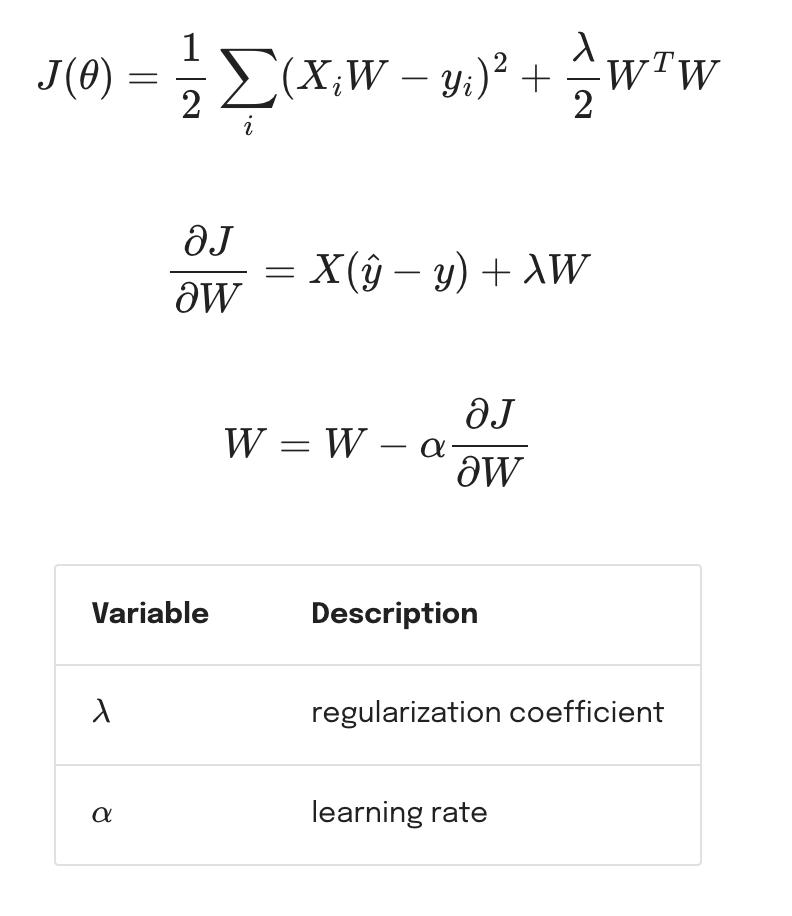

In PyTorch, we can add L2 regularization by adjusting our optimizer. The Adam optimizer has a weight_decay parameter which to control the L2 penalty.

In [ ]:
# Define L2 Regularization parameter
L2_LAMBDA = 1e-2

# Initialize the model
model = LinearRegression(input_dim=INPUT_DIM, output_dim=OUTPUT_DIM)

# Define Adam optimizer with L2 regularization (weight decay)
optimizer = Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=L2_LAMBDA)

# Training loop with L2 regularization
for epoch in range(NUM_EPOCHS):
    # Forward pass
    y_pred = model(X_train)

    # Compute Mean Squared Error (MSE) Loss
    loss = loss_fn(y_pred, y_train)

    # Zero all gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    # Print loss every 20 epochs
    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.2f}")


Epoch: 0 | Loss: 9.07
Epoch: 20 | Loss: 1.29
Epoch: 40 | Loss: 0.02
Epoch: 60 | Loss: 0.04
Epoch: 80 | Loss: 0.02


In [ ]:
# Generate predictions for training and test datasets
pred_train = model(X_train)
pred_test = model(X_test)

# Compute Mean Squared Error (MSE) for train and test sets
train_error = loss_fn(pred_train, y_train)
test_error = loss_fn(pred_test, y_test)

# Print MSE for both datasets
print(f"Train MSE: {train_error:.2f}")
print(f"Test MSE: {test_error:.2f}")


Train MSE: 0.02
Test MSE: 0.02


Regularization did not significantly impact performance in this case because our data was generated from a perfectly linear equation. However, in real-world datasets, where noise and complexity exist, L2 regularization can help the model generalize better by preventing overfitting.